## Summative Lab - ETL Project

### 1) Connecting to SQL database and extracting relevant data

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

connection = sqlite3.connect('database.sqlite')
cur = connection.cursor()

In [2]:
cur.execute(' SELECT * FROM Teams_in_Matches;')
df = pd.DataFrame(cur.fetchall())
df.columns = [i[0] for i in cur.description]
print('Number of results:', len(df))
df.head(10)

Number of results: 49148


,Match_ID,Unique_Team_ID
0,1,26
1,1,46
2,2,26
3,2,42
4,3,26
5,3,44
6,4,29
7,4,44
8,5,29
9,5,49


In [3]:
cur.execute(' SELECT * FROM Matches WHERE season = 2011 ;')
df_wl = pd.DataFrame(cur.fetchall())
df_wl.columns = [i[0] for i in cur.description]
print('Number of results:', len(df_wl))
df_wl.head()

Number of results: 992


,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D


In [4]:
df_wl.loc[df_wl['FTR']=='A','winning_team'] = df_wl['AwayTeam']
df_wl.loc[df_wl['FTR']=='H','winning_team'] = df_wl['HomeTeam']
df_wl.loc[df_wl['FTR']=='A','losing_team'] = df_wl['HomeTeam']
df_wl.loc[df_wl['FTR']=='H','losing_team'] = df_wl['AwayTeam']
df_wl.head(20)

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,winning_team,losing_team
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,Bayern Munich,Nurnberg
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,Bayern Munich,Stuttgart
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,Bayern Munich,Wolfsburg
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,Mainz,Bayern Munich
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,NaN,NaN
5,1097,D1,2011,2012-01-20,M'gladbach,Bayern Munich,3,1,H,M'gladbach,Bayern Munich
6,1098,D1,2011,2012-02-04,Hamburg,Bayern Munich,1,1,D,NaN,NaN
7,1099,D1,2011,2012-04-21,Werder Bremen,Bayern Munich,1,2,A,Bayern Munich,Werder Bremen
8,1100,D1,2011,2011-09-18,Schalke 04,Bayern Munich,0,2,A,Bayern Munich,Schalke 04
9,1101,D1,2011,2011-10-23,Hannover,Bayern Munich,2,1,H,Hannover,Bayern Munich


In [5]:
list_of_teams = set(list(df_wl.AwayTeam)+list(df_wl.HomeTeam))

In [6]:
list_of_teams = list(list_of_teams)

In [7]:
type(list_of_teams)

list

## Calculating goals per team

In [8]:
team_goals = []
no_of_goals = []
for team in list_of_teams:
    experiment_home = df_wl.loc[df_wl['HomeTeam']==team]
    experiment_away = df_wl.loc[df_wl['AwayTeam']==team]
    goals_home = experiment_home['FTHG'].sum()
    goals_away = experiment_away['FTAG'].sum()
    total_goals = goals_home+goals_away
    print(team)
    print(total_goals)
    team_goals.append(team)
    no_of_goals.append(total_goals)
    

Ein Frankfurt
76
Fulham
48
Fortuna Dusseldorf
64
Leverkusen
52
Everton
50
Hoffenheim
41
Liverpool
47
Bayern Munich
77
Newcastle
56
Wolves
40
Kaiserslautern
24
Mainz
47
QPR
43
Duisburg
42
Hertha
38
Ingolstadt
43
Nurnberg
38
Munich 1860
62
Aachen
30
Norwich
52
Bochum
41
M'gladbach
49
FC Koln
39
Dresden
50
Sunderland
45
Hannover
41
Greuther Furth
73
Hansa Rostock
34
Paderborn
51
Stoke
36
Hamburg
35
Union Berlin
55
Bolton
46
Frankfurt FSV
43
Man United
89
Swansea
44
Blackburn
48
Stuttgart
63
Wolfsburg
47
Chelsea
65
Cottbus
30
Freiburg
45
Man City
93
Arsenal
74
St Pauli
59
Augsburg
36
Schalke 04
74
West Brom
45
Erzgebirge Aue
31
Aston Villa
37
Tottenham
66
Braunschweig
37
Werder Bremen
49
Karlsruhe
34
Wigan
42
Dortmund
80


In [9]:
goals_df =pd.DataFrame()

In [10]:
team_goals = pd.Series(team_goals)
no_of_goals = pd.Series(no_of_goals)
goals_df['team_name'] = team_goals
goals_df['total_goals'] = no_of_goals

In [11]:
goals_df.head()

,team_name,total_goals
0,Ein Frankfurt,76
1,Fulham,48
2,Fortuna Dusseldorf,64
3,Leverkusen,52
4,Everton,50


## Creating wins/losses histograms for each team

In [12]:
df_1 = df_wl['winning_team'].value_counts()
df_2 = df_wl['losing_team'].value_counts()

In [13]:
wins_losses = pd.DataFrame(data=dict(s1=df_1, s2=df_2), index=df_1.index)
wins_losses = wins_losses.rename(index=str, columns={"s1": "wins", "s2": "losses"})

wins_losses = wins_losses.transpose()
wins_losses.head()
#there are 56 team in this dataframe

,Man United,Man City,Dortmund,Bayern Munich,Arsenal,Greuther Furth,Schalke 04,Tottenham,Ein Frankfurt,Newcastle,...,Hamburg,Blackburn,Erzgebirge Aue,Frankfurt FSV,Hertha,Aston Villa,Aachen,Wolves,Hansa Rostock,Kaiserslautern
wins,28,28,25,23,21,20,20,20,20,19,...,8,8,8,7,7,7,6,5,5,4
losses,5,5,3,7,10,4,10,9,6,11,...,14,23,15,13,17,14,15,23,17,19


C:\Anaconda\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


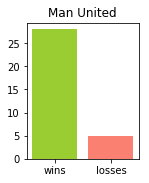

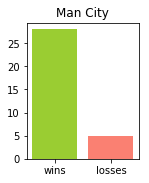

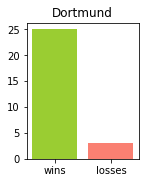

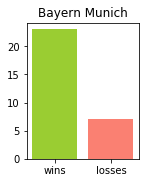

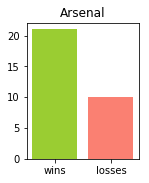

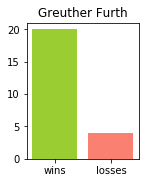

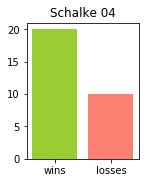

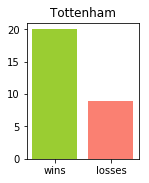

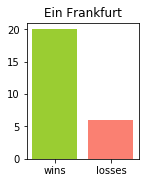

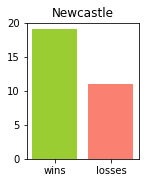

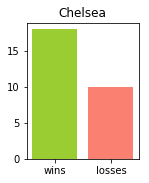

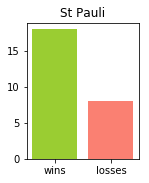

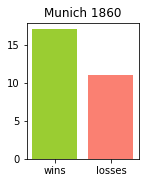

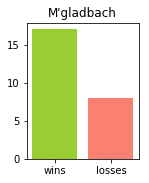

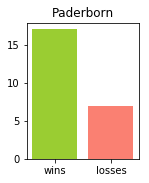

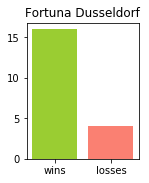

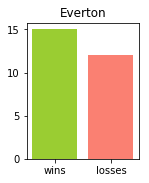

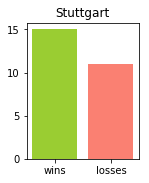

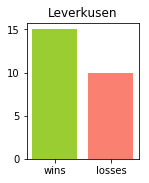

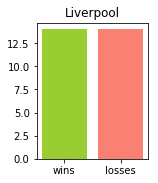

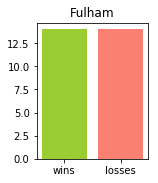

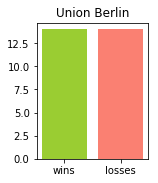

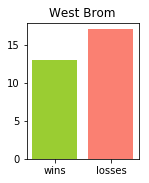

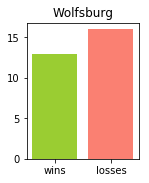

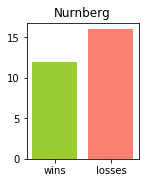

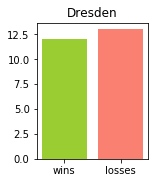

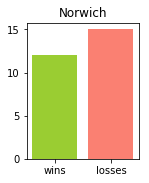

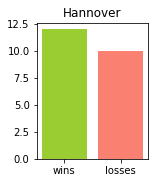

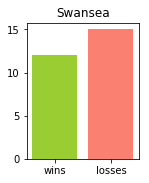

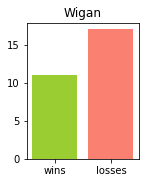

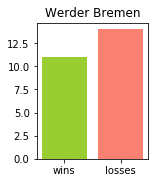

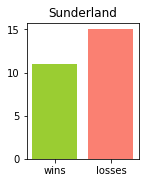

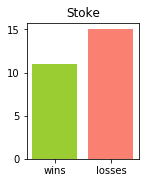

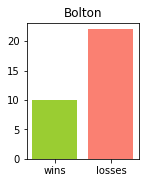

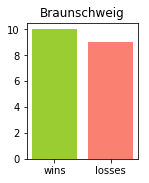

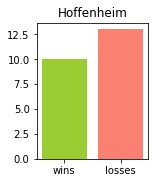

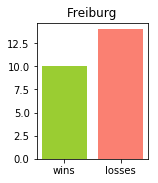

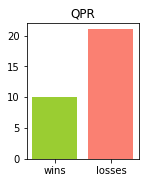

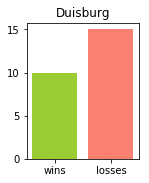

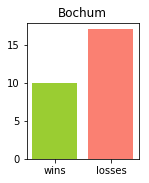

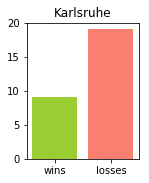

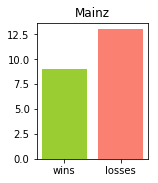

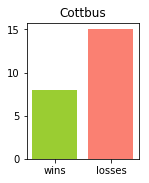

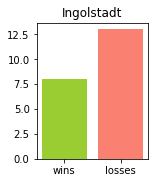

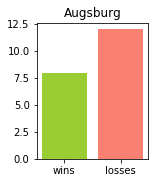

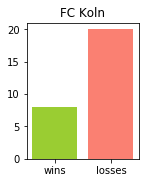

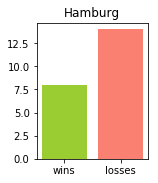

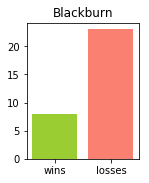

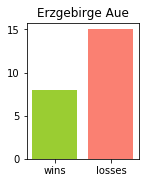

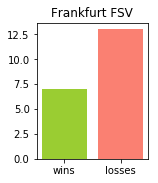

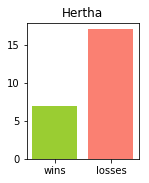

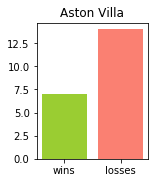

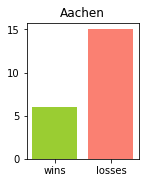

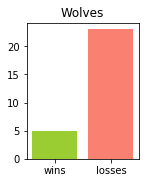

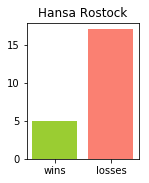

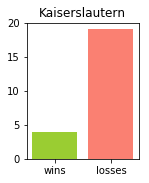

In [16]:
#creating loop

list_of_teams = list(wins_losses.columns)
for team in list_of_teams:
    w_l = ['wins','losses']
    figures = list(wins_losses[team])
    ypos = np.arange(len(w_l))
    plt.figure(figsize=(2,2.5))
    width = [0.8,0.8]
    plt.bar(ypos,figures,width=width,color=['yellowgreen', 'salmon'])
    plt.xticks(ypos,w_l)
    plt.title(team)
    plt.savefig(str(team))

In [92]:
wins_losses2 = wins_losses.transpose()

In [95]:
wins_losses2 = wins_losses2.drop('losses',axis=1)

In [97]:
wins_losses2.head()

,wins
Man United,28
Man City,28
Dortmund,25
Bayern Munich,23
Arsenal,21


## Getting weather conditions for Berlin

In [12]:
#API
import requests
resp1= requests.get('https://api.darksky.net/forecast/KEY/52.5200,13.4050,255589200')
#print(resp1.request.path_url)

In [13]:
resp1.status_code == requests.codes.ok

True

In [14]:
import json
text = resp1.json()

In [15]:
#API test
text['daily']['data'][0].get('precipType')

'snow'

In [ ]:
#Transforming date from original dataset to timestamps

In [16]:
df_wl.Date = df_wl.Date.astype('datetime64')

In [17]:
from datetime import datetime

In [18]:
all_dates = list(df_wl.Date)
#ds = df_wl.Date[0].timestamp()
stamps = []
for date in all_dates:
    ts = date.timestamp()
    ts = int(ts)
    stamps.append(ts)
    
    
timestamps = pd.Series(stamps)    

In [19]:
#Adding new columns to the dataset
df_wl['timestamp'] = timestamps

In [24]:
len(df_wl.Date.unique())
# The dataset has 165 unique dates

165

In [27]:
#testing

trial_2 =df_wl.timestamp.head(2)
trial_2 = list(trial_2)
print(trial_2)

[1333152000, 1323561600]


In [1]:
weather = []
#for trial in stamps:
#    trial_string = str(trial)
#    resp = requests.get('https://api.darksky.net/forecast/KEY/52.5200,13.4050,'+(trial_string))
#    text = resp.json()
#    weather_condition = (text['daily']['data'][0].get('precipType'))
#    weather.append(weather_condition)
    
#error: 'daily'

In [50]:
weather_series = pd.Series(weather)

In [51]:
df_wl['Weather'] = weather_series

In [52]:
df_wl.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,winning_team,losing_team,timestamp,Weather
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,Bayern Munich,Nurnberg,1333152000,rain
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,Bayern Munich,Stuttgart,1323561600,None
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,Bayern Munich,Wolfsburg,1313193600,None
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,Mainz,Bayern Munich,1322352000,None
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,NaN,NaN,1329523200,None


In [46]:
trial_2

[1333152000, 1323561600]

In [48]:
type(stamps) == type(trial_2)

True

In [28]:
cur.execute(' SELECT * FROM Teams_in_Matches JOIN Matches USING (Match_ID) WHERE season = 2011 ;')
df_wl = pd.DataFrame(cur.fetchall())
df_wl.columns = [i[0] for i in cur.description]
print('Number of results:', len(df_wl))
df_wl.head(20)

Number of results: 1984


,Match_ID,Unique_Team_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,1,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1092,22,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
2,1093,1,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
3,1093,17,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
4,1094,1,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
5,1094,7,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
6,1095,1,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
7,1095,11,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
8,1096,1,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D
9,1096,16,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D


In [6]:
cur.execute(' SELECT * FROM unique_teams;')
teams = pd.DataFrame(cur.fetchall())
teams.columns = [i[0] for i in cur.description]
print('Number of results:', len(teams))
teams.head()

Number of results: 128


,TeamName,Unique_Team_ID
0,Bayern Munich,1
1,Dortmund,2
2,Leverkusen,3
3,RB Leipzig,4
4,Schalke 04,5


## Setting up MongoDB database

In [54]:
import pymongo
myclient = pymongo.MongoClient(host='localhost',port=27017,connect=True)

In [56]:
mydb=myclient['football_teams']

In [57]:
print(myclient.list_database_names())

['admin', 'config', 'ex_database', 'lab_db', 'local', 'test']


In [58]:
#creating a new collection
mycollection = mydb['football_data']

In [63]:
mydb.collection_names

<bound method Database.collection_names of Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'football_teams')>

In [65]:
test_insertion = {'name':'teamteam', 'number': '22'}
mycollection.insert_one(test_insertion)

In [ ]:
#The name of the team DONE
#The total number of goals scored by the team during the 2011 season DONE
#The total number of wins the team earned during the 2011 season DONE
#A histogram visualization of the team's wins and losses for the 2011 season (store the visualization directly)
#The team's win percentage on days where it was raining during games in the 2011 season.


In [67]:
team_name = pd.Series(list_of_teams)

In [68]:
df_db = pd.DataFrame()

In [70]:
df_db['team_name'] = team_name

In [86]:
df_db.head()
df_db.set_index('team_name',inplace=True)

In [87]:
df_db.head()

""
team_name
Man United
Man City
Dortmund
Bayern Munich
Arsenal


In [88]:
goals_df.set_index('team_name',inplace=True)

In [89]:
goals_df.head()

,total_goals
team_name,
Man United,89
Man City,93
Dortmund,80
Bayern Munich,77
Arsenal,74


In [90]:
df_db_withgoals = df_db.join(goals_df)

In [91]:
df_db_withgoals.head()

,total_goals
team_name,
Man United,89
Man City,93
Dortmund,80
Bayern Munich,77
Arsenal,74


In [99]:
df_goals_wins = df_db_withgoals.join(wins_losses2)


In [105]:
df_goals_wins.head()
df_goals_wins = df_goals_wins.reset_index()

In [106]:
df_goals_wins.head()

,team_name,total_goals,wins
0,Man United,89,28
1,Man City,93,28
2,Dortmund,80,25
3,Bayern Munich,77,23
4,Arsenal,74,21
